# 데이터프레임 (조건에 따른 조작)

In [40]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 소수점 3자리까지 표시
%precision 3

'%.3f'

In [41]:
data = pd.read_csv('health2018.csv')
data_raw = data
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108


### 데이터프레임 객체의 조건 지정

In [42]:
data[data.age < 30]

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
12,A901024803,M,27,188.4,126.7,106.9,35.695611,90
13,A901024804,M,26,177.9,85.5,90.5,27.015575,96
68,A903022202,F,23,158.8,42.5,61.6,16.853416,86
104,A904024203,M,29,188.2,67.0,71.6,18.916273,93
113,A904027203,F,26,169.9,58.5,66.5,20.266050,85
...,...,...,...,...,...,...,...,...
5931,R903029201,M,25,193.0,74.5,76.4,20.000537,95
5934,R903033301,M,25,174.7,73.8,89.2,24.180794,97
5935,R903034901,M,22,173.2,67.1,73.1,22.367979,94
5936,R903035101,M,22,175.5,63.0,74.1,20.454379,99


In [43]:
data[data.age < 30].describe()

,age,height,weight,waist,BMI,Blood_glucose
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,24.093623,168.515061,65.646269,76.980597,22.945924,89.761194
std,2.950806,8.594850,15.413515,11.323265,4.165240,8.308584
min,19.000000,145.100000,35.700000,57.200000,14.840366,63.000000
25%,22.000000,161.700000,54.700000,68.800000,20.035106,85.000000
50%,24.000000,168.100000,62.800000,75.200000,22.074800,89.000000
75%,26.000000,175.400000,73.800000,83.500000,24.923062,94.000000
max,29.000000,193.000000,144.200000,130.300000,43.918639,171.000000


In [44]:
# 다중조건 지정 실습
# (아래는 작동하지 않음)
data[data.age >= 20 & data.age < 30]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [45]:
# 아래는 작동하나, and를 사용할 경우 작동하지 않음 
# (and: 논리연산자, &: 비트연산자).
data[(data.age >= 20) & (data.age < 30)]

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
12,A901024803,M,27,188.4,126.7,106.9,35.695611,90
13,A901024804,M,26,177.9,85.5,90.5,27.015575,96
68,A903022202,F,23,158.8,42.5,61.6,16.853416,86
104,A904024203,M,29,188.2,67.0,71.6,18.916273,93
113,A904027203,F,26,169.9,58.5,66.5,20.266050,85
...,...,...,...,...,...,...,...,...
5931,R903029201,M,25,193.0,74.5,76.4,20.000537,95
5934,R903033301,M,25,174.7,73.8,89.2,24.180794,97
5935,R903034901,M,22,173.2,67.1,73.1,22.367979,94
5936,R903035101,M,22,175.5,63.0,74.1,20.454379,99


In [46]:
# df.query() 함수를 이용하는 방법
data.query('age >= 20 and age < 30')

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
12,A901024803,M,27,188.4,126.7,106.9,35.695611,90
13,A901024804,M,26,177.9,85.5,90.5,27.015575,96
68,A903022202,F,23,158.8,42.5,61.6,16.853416,86
104,A904024203,M,29,188.2,67.0,71.6,18.916273,93
113,A904027203,F,26,169.9,58.5,66.5,20.266050,85
...,...,...,...,...,...,...,...,...
5931,R903029201,M,25,193.0,74.5,76.4,20.000537,95
5934,R903033301,M,25,174.7,73.8,89.2,24.180794,97
5935,R903034901,M,22,173.2,67.1,73.1,22.367979,94
5936,R903035101,M,22,175.5,63.0,74.1,20.454379,99


### 데이터프레임 객체의 내부 변수값 조작

In [47]:
# 단일 조건을 사용한 경우에도, 내부 변수값을 조작할 수 없음.
# data[조건식] 형태로 지정한 경우, 해당 조건에 대응하는 행+열만 추출하여 '새로운' 데이터프레임 객체로 반환하기 때문.
data[data.sex == 'M'].BMI = 0
data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108


In [48]:
d1 = data[data.sex == 'M']
d1.BMI = 0
d1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,0,103
1,A901021301,M,78,167.7,76.4,98.3,0,127
6,A901023501,M,44,180.0,85.6,96.1,0,163
8,A901023901,M,36,172.6,69.0,84.2,0,86
10,A901024801,M,57,177.1,94.1,107.0,0,99
...,...,...,...,...,...,...,...,...
5959,R904027302,M,50,179.2,86.6,91.6,0,98
5960,R904027502,M,62,162.2,54.6,82.2,0,92
5961,R904028101,M,42,175.5,78.1,91.4,0,102
5962,R904028501,M,41,178.7,91.0,93.2,0,88


In [55]:
# 참고 (.loc[]으로 지정한 경우)
# 데이터프레임 객체.loc[행 조건, 열 조건]
data.loc[data.sex == 'M', :]

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,0.0,103
1,A901021301,M,78,167.7,76.4,98.3,0.0,127
6,A901023501,M,44,180.0,85.6,96.1,0.0,163
8,A901023901,M,36,172.6,69.0,84.2,0.0,86
10,A901024801,M,57,177.1,94.1,107.0,0.0,99
...,...,...,...,...,...,...,...,...
5959,R904027302,M,50,179.2,86.6,91.6,0.0,98
5960,R904027502,M,62,162.2,54.6,82.2,0.0,92
5961,R904028101,M,42,175.5,78.1,91.4,0.0,102
5962,R904028501,M,41,178.7,91.0,93.2,0.0,88


In [52]:
# 참고 (.loc[]으로 지정한 경우)
data.loc[data.sex == 'M', 'BMI'] = 0
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,0.000000,103
1,A901021301,M,78,167.7,76.4,98.3,0.000000,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,0.000000,108


### 단일조건: 비만 (BMI >= 25) 조건 열 추가하기

In [56]:
# for 문과 if 문을 이용한 방법
data['obesity'] = ['Obese' if b >= 25 else 'Normal' for b in data['BMI']]
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity
0,A901020501,M,80,162.4,56.0,82.2,0.000000,103,Normal
1,A901021301,M,78,167.7,76.4,98.3,0.000000,127,Normal
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Normal
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Normal
5966,R904029201,M,43,176.8,84.1,99.2,0.000000,108,Normal


In [57]:
# np.where() 메소드 활용
data['obesity'] = np.where(data['BMI'] > 25, '비만', '정상')
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity
0,A901020501,M,80,162.4,56.0,82.2,0.000000,103,정상
1,A901021301,M,78,167.7,76.4,98.3,0.000000,127,정상
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,정상
5966,R904029201,M,43,176.8,84.1,99.2,0.000000,108,정상


### 다중조건: 정상 (BMI 18.5 ~ 23), 과체중 (BMI 23 ~ 25), 비만 (BMI >= 25) 조건 분류

In [58]:
# for문과 if문 활용
data['obesity'] = ['Obese' if b >= 25 else 'Overweight' if b >= 23  else 'Normal' for b in data['BMI']]
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity
0,A901020501,M,80,162.4,56.0,82.2,0.000000,103,Normal
1,A901021301,M,78,167.7,76.4,98.3,0.000000,127,Normal
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Overweight
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Overweight
5966,R904029201,M,43,176.8,84.1,99.2,0.000000,108,Normal


In [60]:
# np.select() 메소드 활용
condition_list = [(data.BMI >=25), 
                  (data.BMI < 25) & (data.BMI >= 23), 
                  (data.BMI < 23) ]
choice_list = [ '비만', '과체중', '정상' ]
data['obesity'] = np.select(condition_list, choice_list, default = 'NaN')
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity
0,A901020501,M,80,162.4,56.0,82.2,0.000000,103,정상
1,A901021301,M,78,167.7,76.4,98.3,0.000000,127,정상
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,과체중
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,과체중
5966,R904029201,M,43,176.8,84.1,99.2,0.000000,108,정상


***

# 데이터 시각화

In [61]:
# 라이브러리 임포트
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

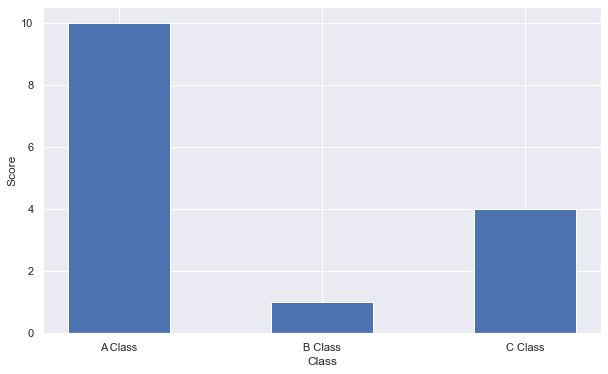

In [63]:
# 대상 데이터
x = [1, 2, 3]
y = [10, 1, 4]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['A Class', 'B Class', 'C Class'])

# x와 y 레이블 설정
plt.xlabel('Class')
plt.ylabel('Score')

# 그리드 표시
plt.grid(True)

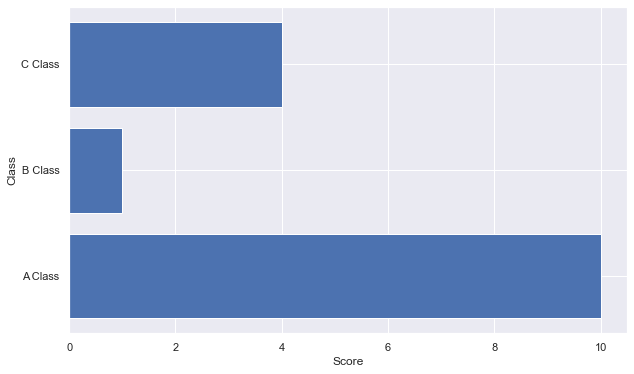

In [126]:
# 대상 데이터
x = [1, 2, 3]
y = [10, 1, 4]

# 그래프 크기 지정 
plt.figure(figsize = (10, 6))

plt.barh(x, y, align = 'center')
plt.yticks(x, ['A Class','B Class','C Class'])
plt.ylabel('Class')
plt.xlabel('Score')
plt.grid(True)

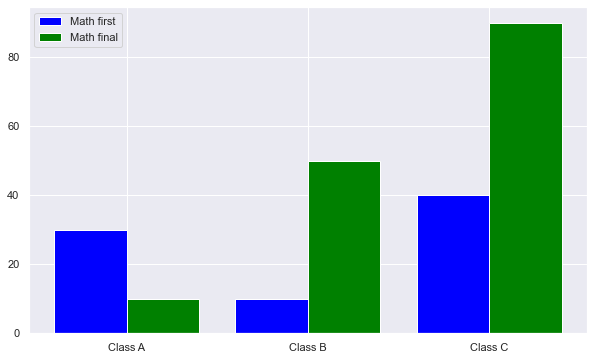

In [10]:
# 데이터 생성
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

# X축 데이터
x = np.arange(len(y1))

# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'Math final', align = 'center')

# 최적 위치에 범례 배치
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

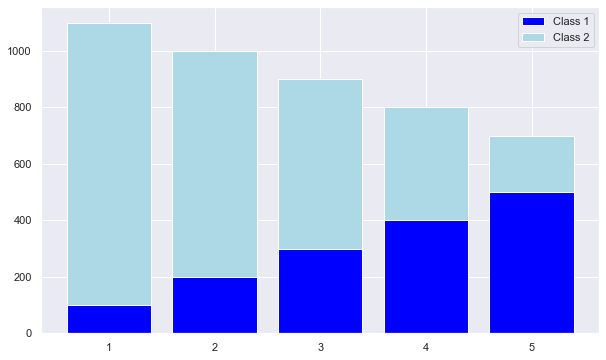

In [64]:
# 데이터 생성
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

# X축
x = np.array([1, 2, 3, 4, 5]) 

# 그래프 크기 지정 
plt.figure(figsize = (10, 6))

# 그래프 출력
p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue')

# 범례 표시 
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

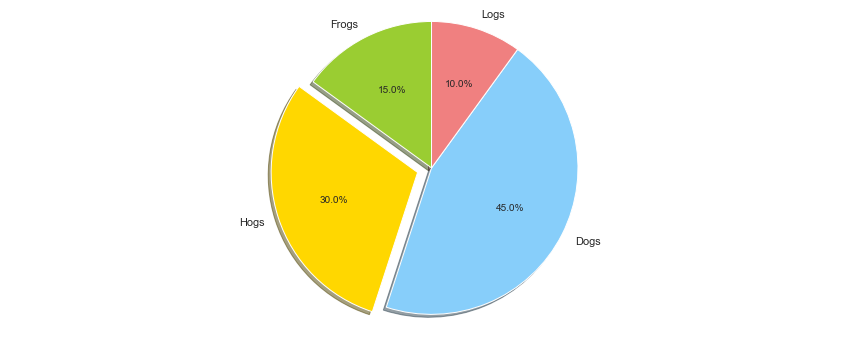

In [65]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) 

# 그래프 크기 지정
plt.figure(figsize = (15, 6))

# 그래프 출력
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
# counterclock = False 옵션을 추가해볼 것.

# 원을 그림
plt.axis('equal')


In [22]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

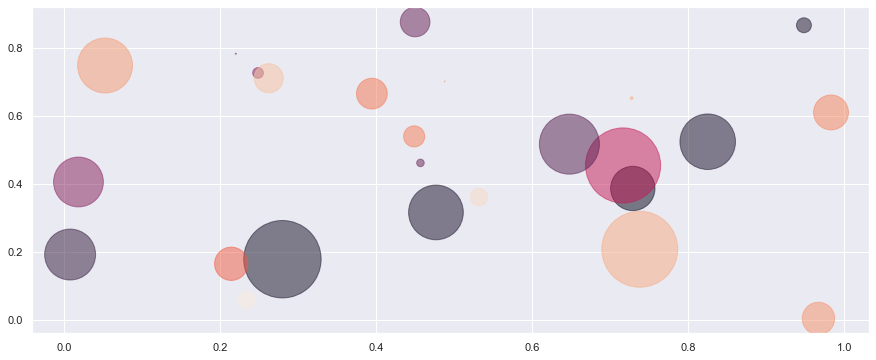

In [66]:
N = 25

# 무작위로 X, Y 데이터 생성
x = np.random.rand(N)
y = np.random.rand(N)

# color 번호
colors = np.random.rand(N)

# 버블의 크기를 다양하게 함
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

# 그래프 크기 지정
plt.figure(figsize = (15, 6))

# 그래프 출력
plt.scatter(x, y, s = area, c = colors, alpha = 0.5)
plt.grid(True)

In [12]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

### 데이터프레임 기반 그래프 그리기: barplot, boxplot, violinplot

In [67]:
# seaborn 내장 붓꽃 데이터 검색
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


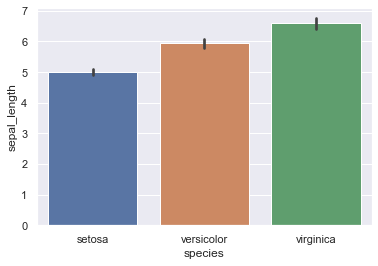

In [68]:
# 막대그래프(barplot) 예시
sns.barplot(x = "species", y  = "sepal_length", data = iris)
?sns.barplot

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

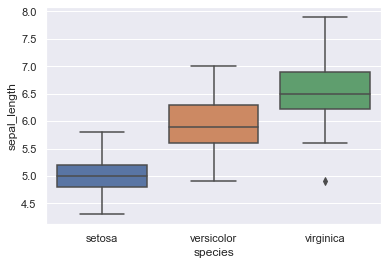

In [69]:
# 박스플롯(boxplot) 예시
sns.boxplot(x = "species", y  = "sepal_length", data = iris)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

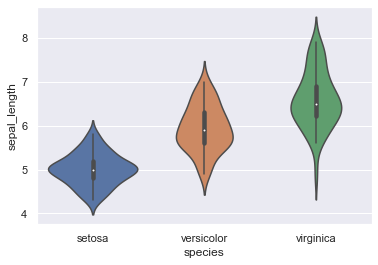

In [70]:
# 바이올린플롯(violinplot) 예시
sns.violinplot(x = "species", y  = "sepal_length", data = iris)